In [93]:
# !git add .
# !git commit -m "added graphs"
# !git pull
# !git push 

[master 79fd932] additional model performance metrics
 2 files changed, 410 insertions(+), 332 deletions(-)
Already up to date.


To https://github.com/thernandez7/Animal-Shelter-Data-Analysis--DS-F24
   73d34bb..79fd932  master -> master


### Data Fields:

impound_no: Unique impound record number

Animal_ID: Animal identifier

Data_Source: The source organization for the data

Record_Type: Status of the animal (e.g., FOUND, ADOPTABLE)

Animal_Name: Name of the animal (if available)

animal_type: Type of animal (e.g., Cat, Dog)

Age: Age of the animal

Animal_Gender: Gender of the animal

City and State: Geographic location details

In [1]:
import pandas as pd

pets_data = pd.read_csv("pets.csv",nrows=440)

#pets_data.head()

## NLP Word Clouds for each pet

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

additional_stop_words = {'old', 'age', 'king', 'county','names','name', 'year', 'possibly','block', "dont", "id", "unknown",\
                         'recent','always','also','find','shes', "hes", 'know', 'due','come','go', 'examine',\
                         'able','pick','since','likely','fine','quite','could','still','years','get','keep','need',\
                         'move seeking','brought','likes','may','new','around','stay','lots','please','behind', \
                         "currently", 'enough', 'start', "come", "tend", "especially", 'entire','meant','plenty','must',\
                         'many','avenue','would','give','show','join','often','like','might','even','better','time','take', "carefully",\
                         'ever','something','set','bring','anything', 'hello','date','provide','sure','live','lives','feel','never',"eventually",\
                         'move',"months", "weeks"}
stop_words.update(additional_stop_words)  # Combine both sets of stop words

def clean_memo(text):
    if isinstance(text, str):  # Process only if the text is a string
        text = text.lower()
        text = re.sub(r'\b(?:Description|Found Near|Received on|Adoption Fee|Current Location|Location Lost|Age|Found Date|Lost Date|)\b:', '', text, flags=re.IGNORECASE)
        text = re.sub(r'\$\d+(?:\.\d{2})?', '', text) #remove money
        text = re.sub(r'\b\d{4}-\d{2}-\d{2}\b', '', text) #remove dates
        text = re.sub(r'<[^>]*>|[^a-zA-Z\s]', '', text) #symbols and punct. 
        text = re.sub(r'\b\d+\b', '', text) #stand alone numbers and addresses
        text = re.sub(r'\b(nd|ave|se|sw|rd|mt|pt|im|ne|dmh|th|pl|us|ct|nw|mo|sh|lbs|st|wa|rd|j|hi|pm|ft|x|blvd)\b', '', text) #specific words
        text = ' '.join(text.split()) #excess space
        text = ' '.join([word for word in text.split() if word.lower() not in stop_words]) #stopwords
        return text.strip()
    return text

pets_data['Memo_cleaned'] = pets_data['Memo'].apply(clean_memo)
pets_data['Memo_cleaned'] = pets_data['Memo_cleaned'].str.replace(r'<p/?>', ' ', regex=True)

pets_data[['Memo', 'Memo_cleaned']].head()
# for line in pets_data['Memo_cleaned']:
    # print(line)
    # print()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tizia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tizia\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Memo,Memo_cleaned
0,Received on: 2024-10-29<p/> Found Near: 28600 ...,brn tabby white male domestic shorthair cat pe...
1,Received on: 2024-11-01<p/> Found Near: 30100 ...,black neutered male domestic longhair cat pet ...
2,Received on: 2024-10-19<p/> Found Near: 14700 ...,gray tabby white male domestic shorthair cat
3,Description: Fur trimmed short. Possibly a pup...,fur trimmed short puppy small skinny tukwila s...
4,Received on: 2024-11-02<p/> Description: Brown...,brown white neutered male pit bull dog pet ado...


In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Create a directory to store word cloud images if it doesn't exist
output_dir = "pet_wordclouds"
os.makedirs(output_dir, exist_ok=True)

# Function to generate word cloud for each memo and save as an image
def generate_wordcloud(text, filename):
    if isinstance(text, str) and text.strip(): 
        wordcloud = WordCloud(width=500, height=500, background_color="white").generate(text)
        file_path = os.path.join(output_dir, filename)
        wordcloud.to_file(file_path)
        return file_path
    return None

# Apply the function to each cleaned memo and save the paths in a new column
pets_data['WordCloud_Path'] = pets_data['Memo_cleaned'].apply(
    lambda text: generate_wordcloud(text, f"{hash(text)}.png")
)

# Display the updated DataFrame with the WordCloud_Path column
pets_data[['Memo_cleaned', 'WordCloud_Path']].head()



KeyboardInterrupt



# Data Cleaning

In [4]:
#clean age from symbols, use lowercase, 
pets_data['Age'] = pets_data['Age'].astype(str).str.replace(r'<.*?>', '', regex=True).str.lower()

# Display the unique values 
unique_age = pets_data['Age'].unique()
unique_animal_type = pets_data['animal_type'].unique()
unique_animal_gender = pets_data['Animal_Gender'].unique()
unique_animal_record_type = pets_data['Record_Type'].unique()

unique_age, unique_animal_type, unique_animal_gender,unique_animal_record_type


(array(['14 weeks', '2 years', 'no age', 'under 1 year', '6 years',
        'over 1 year', 'unknown', '12 weeks', '9 weeks',
        '2 years 6 months', '3 years', '1 year', '4 months', '9 years',
        '13 years 1 month', '7 months', '7 weeks', '2 years 2 months',
        '11 weeks', '9 months', '8 weeks', '10 weeks', '1 year 6 months',
        '5 years', '5 months', '8 months', '3 years 1 month',
        '1 year 1 month', '6 months', '11 months', '1 year 2 months',
        '4 years 3 months', '10 years', '2 years 3 months',
        '12 years 1 month', '3 years 3 months', '4 years 1 month',
        '1 year 10 months', '16 weeks', '2 years 1 month',
        '3 years 8 months', '3 years 5 months', '5 years 2 months',
        '5 years 1 month', '5 weeks', '12 years'], dtype=object),
 array(['Cat', 'Deceased Cat', 'Dog', 'Rabbit Sh', 'Barn Cat', 'Bird',
        'Rabbit', 'Deceased Dog', 'Rodent'], dtype=object),
 array(['Male', 'Neutered Male', 'Female', 'Spayed Female', 'Unknown'],
   

In [7]:
import re
import pandas as pd
import numpy as np

# to convert age strings to numeric age in years
def convert_age_to_years(age_str):
    #special cases
    if 'unknown' in age_str or 'no age' in age_str:
        return np.nan
    if 'under 1 year' in age_str:
        return 0.5
    if 'over 1 year' in age_str:
        return 1.5

    # Extract years, months, and weeks
    years = re.search(r'(\d+)\s*year', age_str)
    months = re.search(r'(\d+)\s*month', age_str)
    weeks = re.search(r'(\d+)\s*week', age_str)

    # Convert to numeric values
    years = int(years.group(1)) if years else 0
    months = int(months.group(1)) / 12 if months else 0
    weeks = int(weeks.group(1)) / 52 if weeks else 0

    return years + months + weeks



age_in_years = [convert_age_to_years(age) for age in pets_data['Age']]

# Convert to a pandas DataFrame for better visualization
age_df = pd.DataFrame({'Age_String': pets_data['Age'], 'Age_in_Years': age_in_years})
print(age_df)

pets_data["Age"]= age_in_years
pets_data.columns

       Age_String  Age_in_Years
0        14 weeks      0.269231
1         2 years      2.000000
2          no age           NaN
3    under 1 year      0.500000
4         6 years      6.000000
..            ...           ...
435        1 year      1.000000
436        no age           NaN
437   over 1 year      1.500000
438        no age           NaN
439       unknown           NaN

[440 rows x 2 columns]


Index(['impound_no', 'Animal_ID', 'Data_Source', 'Record_Type', 'Link',
       'Current_Location', 'Animal_Name', 'animal_type', 'Age',
       'Animal_Gender', 'Animal_Breed', 'Animal_Color', 'Date', 'Date_Type',
       'Obfuscated_Address', 'City', 'State', 'Zip', 'jurisdiction',
       'obfuscated_latitude', 'obfuscated_longitude', 'Image',
       'image_alt_text', 'Memo', 'Temperament', 'Memo_cleaned'],
      dtype='object')

In [9]:
# Define the columns to keep for exporting
export_columns = [
    'impound_no', 'Animal_ID', 'Data_Source', 'Record_Type', 'Link', 
    'Current_Location', 'Animal_Name', 'animal_type', 'Age', 'Animal_Gender', 
    'Animal_Breed', 'Animal_Color', 'Date', 'Date_Type', 'Obfuscated_Address', 
    'City', 'State', 'Zip', 'jurisdiction', 'obfuscated_latitude', 
    'obfuscated_longitude', 'Image', 'image_alt_text', 'Memo', 'Memo_cleaned'
]

# Ensure only the specified columns are included in the cleaned dataset
cleaned_data = pets_data[export_columns]

# Save the cleaned dataset to a new CSV file
cleaned_data.to_csv('cleaned_pet_data.csv', index=False)

print("Cleaned dataset has been saved as 'cleaned_pet_data_final.csv'.")


Cleaned dataset has been saved as 'cleaned_pet_data_final.csv'.


# Data Exploratory Analysis

animal_type
Cat             238
Dog             157
Barn Cat         23
Rabbit Sh        10
Deceased Cat      4
Deceased Dog      4
Rabbit            2
Bird              1
Rodent            1
Name: count, dtype: int64


C:\Users\tizia\AppData\Local\Temp\ipykernel_22096\488643587.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='animal_type', data=data,  palette='pastel')


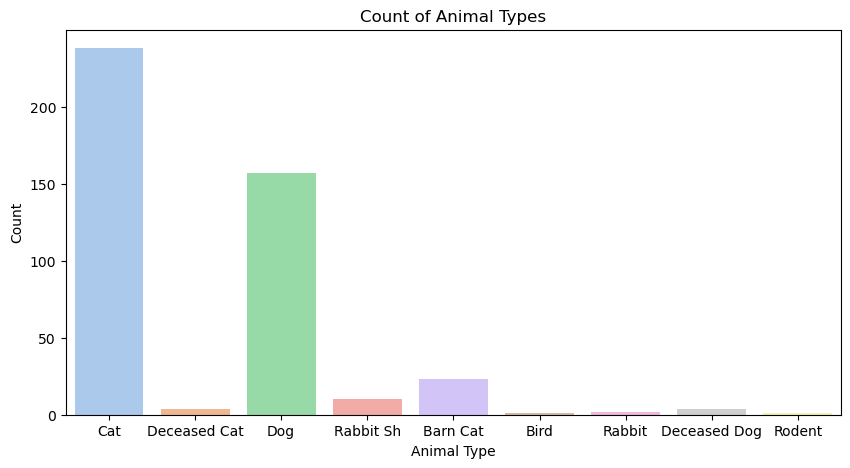

C:\Users\tizia\AppData\Local\Temp\ipykernel_22096\488643587.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Animal_Gender', data=data, palette='viridis')


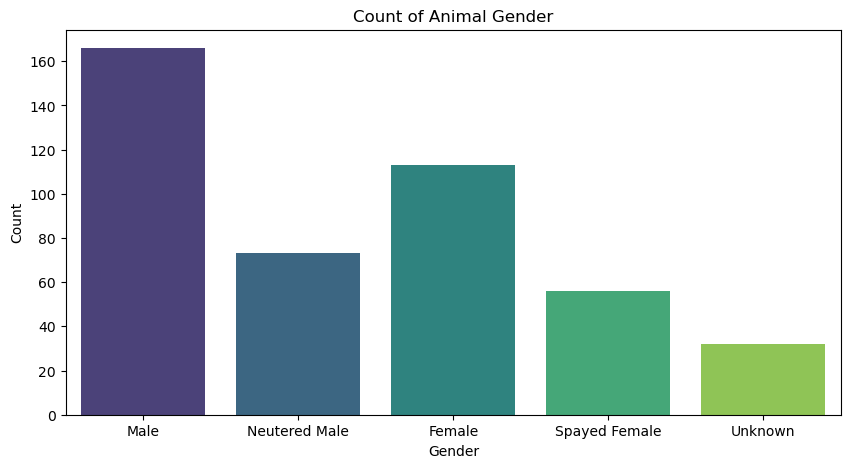

Animal_Breed
Domestic Shorthair           136
Domestic Mediumhair           42
American Shorthair            38
Pit Bull                      24
Domestic Longhair             22
Siberian Husky                10
Pit Bull / Mix                10
Rabbit Sh                     10
American Pit Bull Terrier      9
German Shepherd                8
Name: count, dtype: int64


C:\Users\tizia\AppData\Local\Temp\ipykernel_22096\488643587.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_breeds.index, y=top_breeds.values, palette='muted')


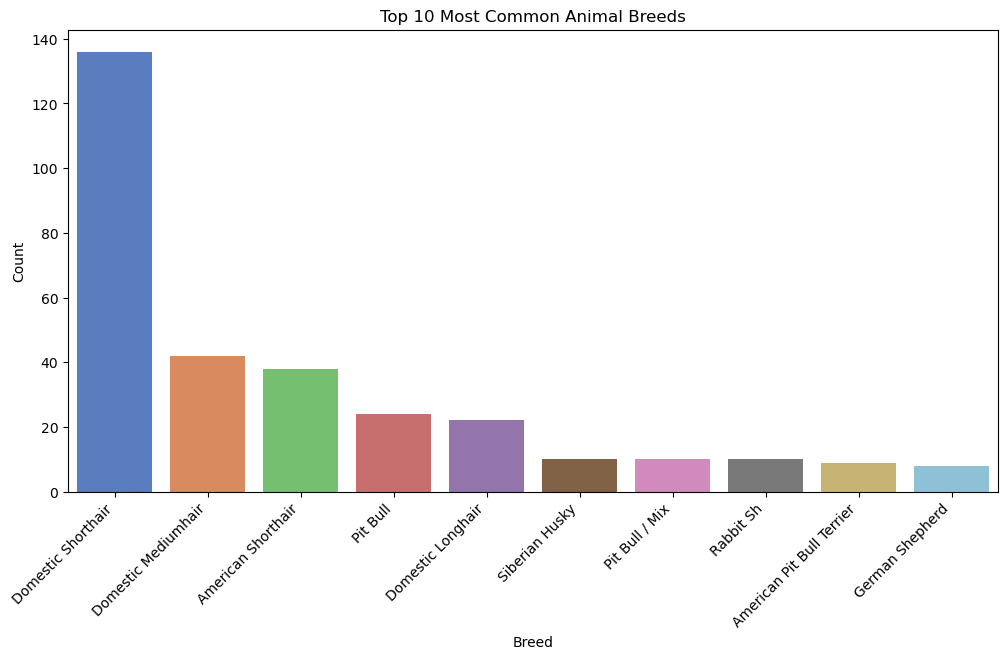

C:\Users\tizia\AppData\Local\Temp\ipykernel_22096\488643587.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shortened_labels, y=location_counts.values, palette='viridis')


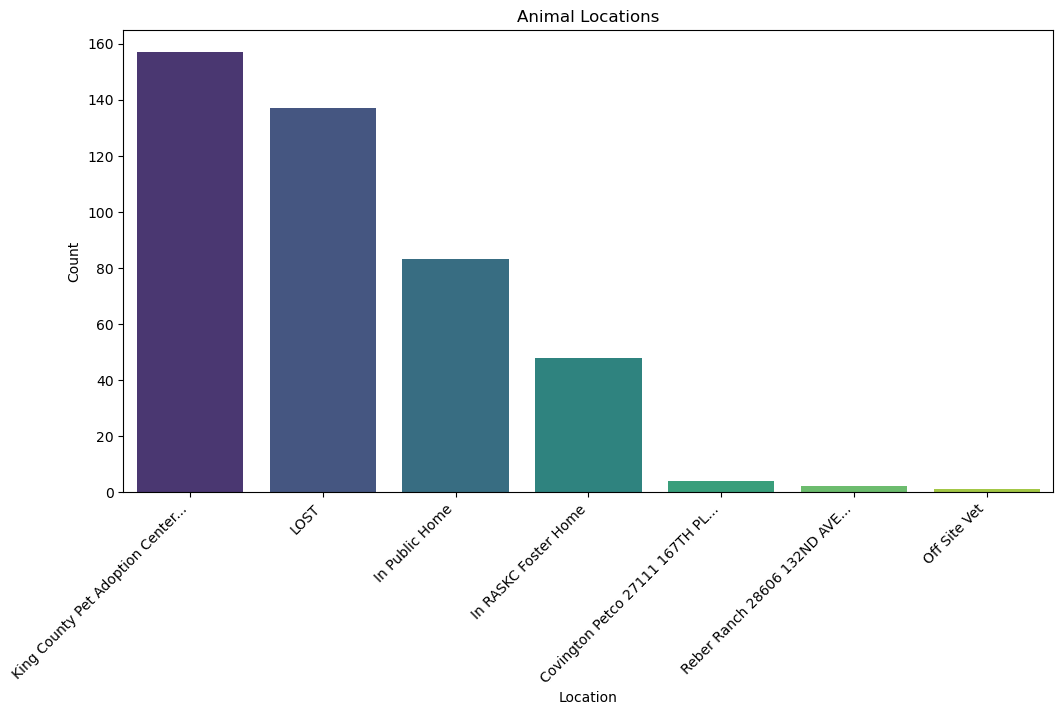

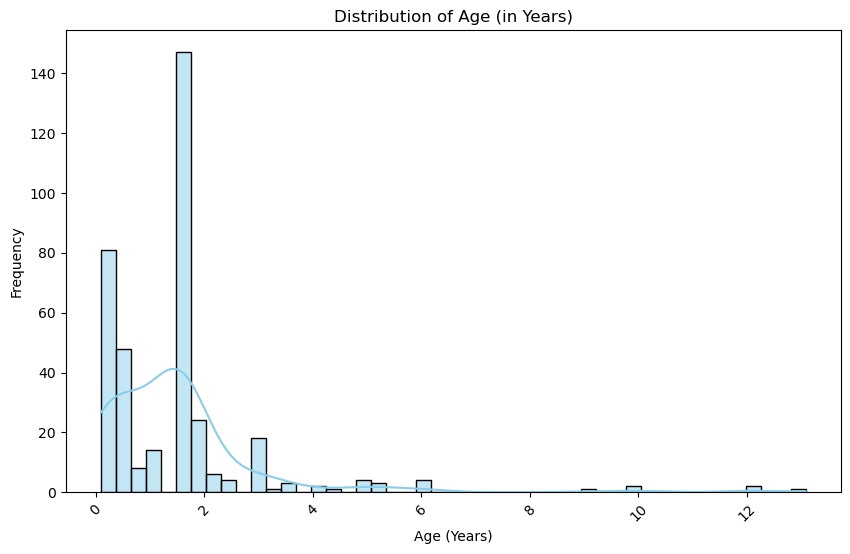

C:\Users\tizia\AppData\Local\Temp\ipykernel_22096\488643587.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='animal_type', y='Age', data=pets_data, palette='Set2')


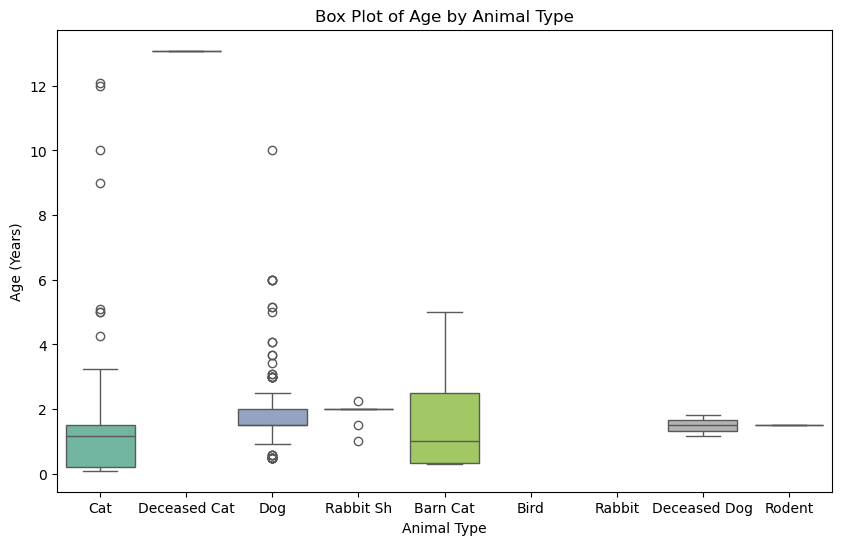

C:\Users\tizia\AppData\Local\Temp\ipykernel_22096\488643587.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Animal_Gender', y='Age', data=pets_data, palette='Set1')


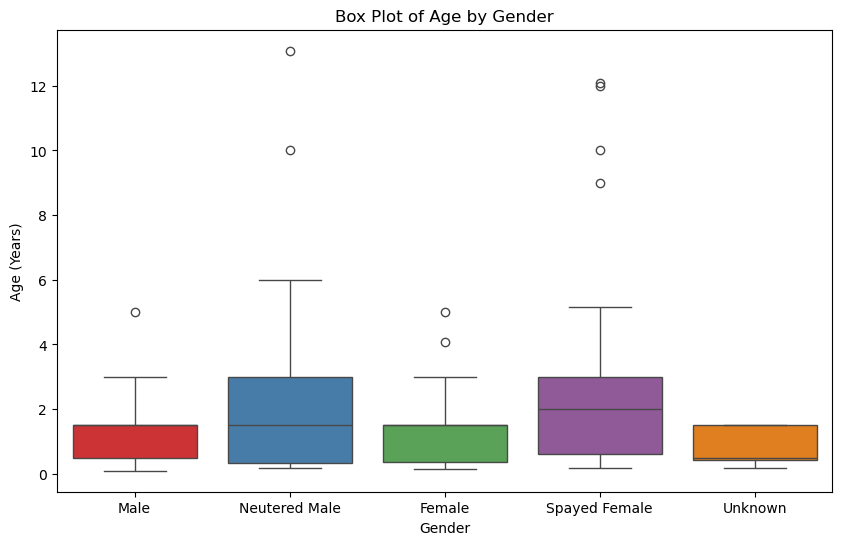

C:\Users\tizia\AppData\Local\Temp\ipykernel_22096\488643587.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=record_type_counts.index, y=record_type_counts.values, palette='viridis')


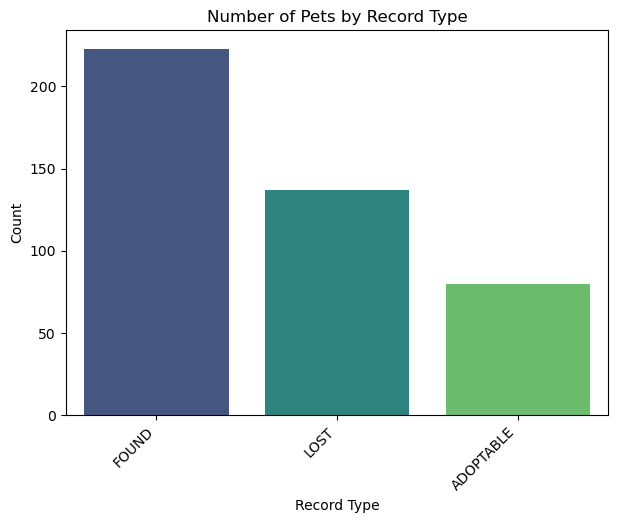

1.494172494172494

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pets_data= pd.read_csv('cleaned_pet_data.csv')
data=pets_data

print(pets_data['animal_type'].value_counts())

plt.figure(figsize=(10, 5))
sns.countplot(x='animal_type', data=data,  palette='pastel')
plt.title('Count of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Animal_Gender', data=data, palette='viridis')
plt.title('Count of Animal Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

top_breeds = pets_data['Animal_Breed'].value_counts().nlargest(10)
print(top_breeds)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_breeds.index, y=top_breeds.values, palette='muted')
plt.title('Top 10 Most Common Animal Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


location_counts = pets_data['Current_Location'].value_counts().nlargest(10)
shortened_labels = [' '.join(label.split()[:5]) + '...' if len(label.split()) > 5 else label for label in location_counts.index]

plt.figure(figsize=(12, 6))
sns.barplot(x=shortened_labels, y=location_counts.values, palette='viridis')
plt.title('Animal Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(pets_data['Age'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Age (in Years)')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Box plot for `Age_in_Years` by `animal_type` (cats vs. dogs)
plt.figure(figsize=(10, 6))
sns.boxplot(x='animal_type', y='Age', data=pets_data, palette='Set2')
plt.title('Box Plot of Age by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Age (Years)')
plt.show()

# Box plot for `Age_in_Years` by `Animal_Gender` (male vs. female)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Animal_Gender', y='Age', data=pets_data, palette='Set1')
plt.title('Box Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age (Years)')
plt.show()

record_type_counts = pets_data['Record_Type'].value_counts()
plt.figure(figsize=(7, 5))
sns.barplot(x=record_type_counts.index, y=record_type_counts.values, palette='viridis')
plt.title('Number of Pets by Record Type')
plt.xlabel('Record Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

pets_data["Age"].mean()


## Temperament of Cats vs Dogs Analysis


Personality Traits Summary by Animal Type:
               is_friendly  is_aggressive  is_shy  is_playful  is_nice  \
animal_type                                                             
Barn Cat                0              0       0           0        0   
Bird                    1              0       0           0        0   
Cat                    20              0      16           1        4   
Deceased Cat            0              0       0           0        0   
Deceased Dog            0              0       0           0        0   
Dog                     8              1      13           3        5   
Rabbit                  1              0       0           0        0   
Rabbit Sh               0              0       0           0        0   
Rodent                  0              0       0           0        0   

              is_calm  is_quiet  is_clingy  is_mean  
animal_type                                          
Barn Cat            0         0          0  

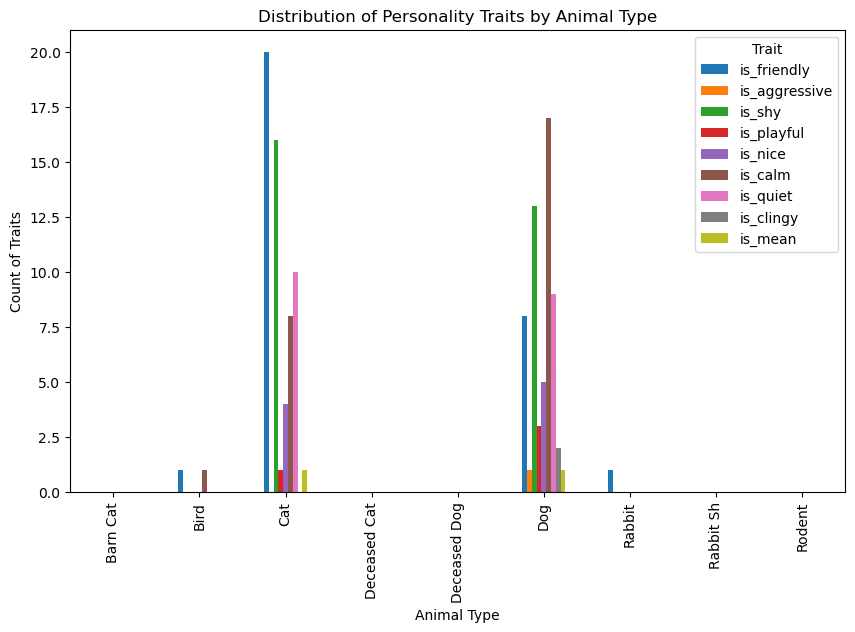

             is_friendly  is_aggressive  is_shy  is_playful  is_nice  is_calm  \
animal_type                                                                     
Cat                   20              0      16           1        4        8   
Dog                    8              1      13           3        5       17   

             is_quiet  is_clingy  is_mean  
animal_type                                
Cat                10          0        1  
Dog                 9          2        1  

animal_type
Cat             238
Dog             157
Barn Cat         23
Rabbit Sh        10
Deceased Cat      4
Deceased Dog      4
Rabbit            2
Bird              1
Rodent            1
Name: count, dtype: int64
             is_friendly  is_aggressive    is_shy  is_playful   is_nice  \
animal_type                                                               
Cat             0.084034       0.000000  0.067227    0.004202  0.016807   
Dog             0.050955       0.006369  0.082803    0.

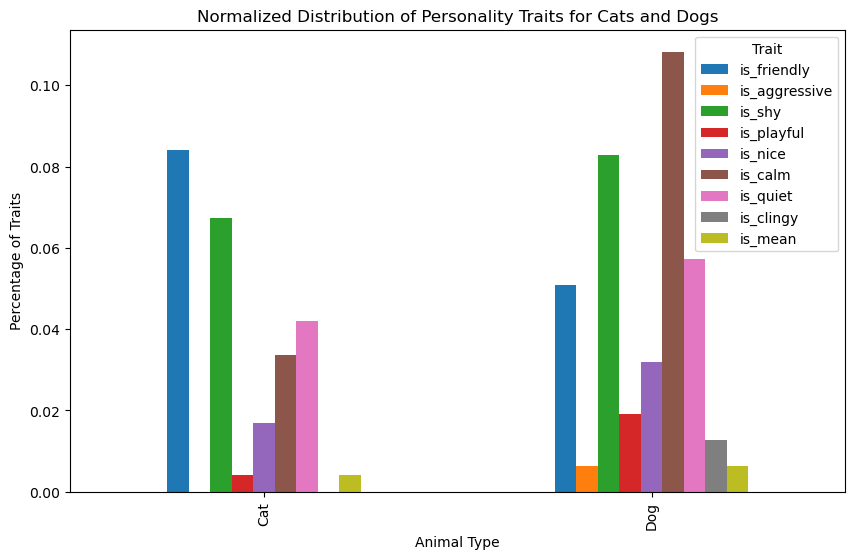

In [15]:
#Extract Personality Traits from Memo Field
personality_keywords = ['friendly', 'aggressive', 'shy', 'playful', 'nice', 'calm', 'quiet', \
                        'clingy', 'mean',]
for keyword in personality_keywords:
    data[f'is_{keyword}'] = data['Memo_cleaned'].str.contains(keyword, case=False, na=False).astype(int)

#distribution of personality traits by animal type
personality_summary = data.groupby('animal_type')[[f'is_{keyword}' for keyword in personality_keywords]].sum()
print("Personality Traits Summary by Animal Type:\n", personality_summary)

#Bar Plot of Extracted Personality Traits ---
personality_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Personality Traits by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Count of Traits')
plt.legend(title='Trait')
plt.show()

#-------------------------------------------------------------------------------------------------
#Filter the summary to include only 'cat' and 'dog'
filtered_personality_summary = personality_summary.loc[['Cat', 'Dog']]
print(filtered_personality_summary)
print()

#Normalize the counts by dividing by the total count of cats/dogs respective to row
total_counts = pets_data['animal_type'].value_counts()
print(total_counts)
normalized_summary = filtered_personality_summary.div(total_counts[['Cat', 'Dog']], axis=0)
print(normalized_summary)

#Bar Plot of Normalized Personality Traits for Cats and Dogs
normalized_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Normalized Distribution of Personality Traits for Cats and Dogs')
plt.xlabel('Animal Type')
plt.ylabel('Percentage of Traits')
plt.legend(title='Trait')
plt.show()



Personality Traits Summary by Animal Type:
               is_friendly  is_aggressive  is_shy  is_playful  is_nice  \
animal_type                                                             
Barn Cat                0              0       0           0        0   
Bird                    1              0       0           0        0   
Cat                    20              0      16           1        4   
Deceased Cat            0              0       0           0        0   
Deceased Dog            0              0       0           0        0   
Dog                     8              1      13           3        5   
Rabbit                  1              0       0           0        0   
Rabbit Sh               0              0       0           0        0   
Rodent                  0              0       0           0        0   

              is_calm  is_quiet  is_clingy  is_mean  
animal_type                                          
Barn Cat            0         0          0  

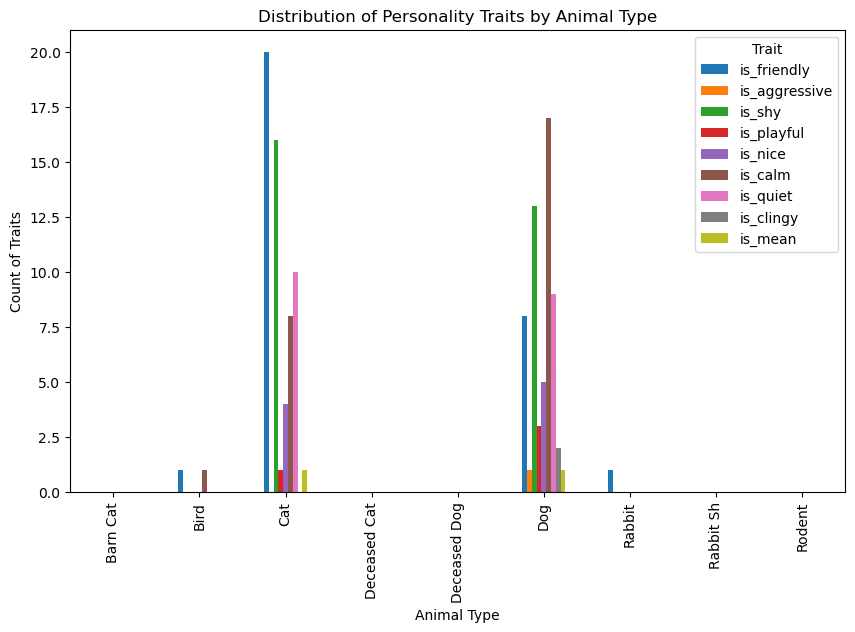

             is_friendly  is_aggressive  is_shy  is_playful  is_nice  is_calm  \
animal_type                                                                     
Cat                   20              0      16           1        4        8   
Dog                    8              1      13           3        5       17   

             is_quiet  is_clingy  is_mean  
animal_type                                
Cat                10          0        1  
Dog                 9          2        1  

             is_friendly  is_aggressive  is_shy  is_playful  is_nice  is_calm  \
animal_type                                                                     
Cat                   20              0      16           1        4        8   
Dog                    8              1      13           3        5       17   

             is_quiet  is_clingy  is_mean  No Traits  
animal_type                                           
Cat                10          0        1        204  
Dog     

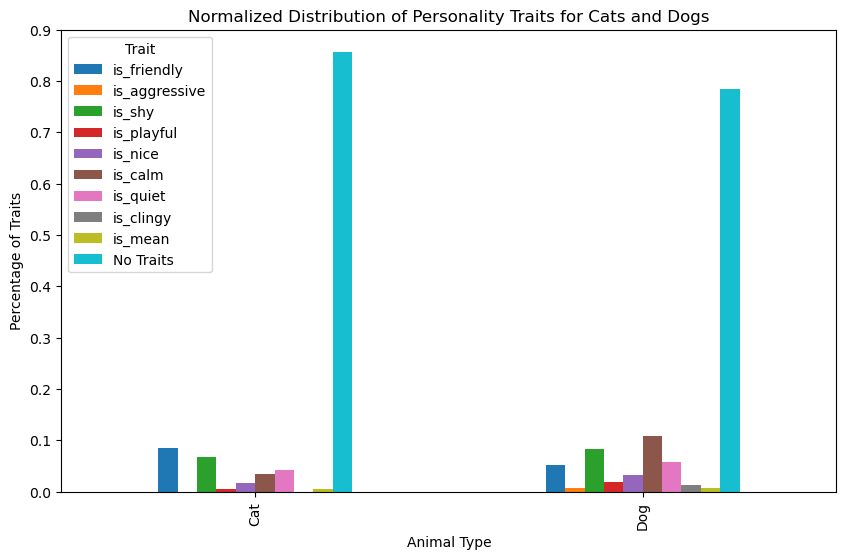

In [13]:
#Copy
#Extract Personality Traits from Memo Field
personality_keywords = ['friendly', 'aggressive', 'shy', 'playful', 'nice', 'calm', 'quiet', \
                        'clingy', 'mean',]
for keyword in personality_keywords:
    data[f'is_{keyword}'] = data['Memo_cleaned'].str.contains(keyword, case=False, na=False).astype(int)

#distribution of personality traits by animal type
personality_summary = data.groupby('animal_type')[[f'is_{keyword}' for keyword in personality_keywords]].sum()
print("Personality Traits Summary by Animal Type:\n", personality_summary)

#Bar Plot of Extracted Personality Traits ---
personality_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Personality Traits by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Count of Traits')
plt.legend(title='Trait')
plt.show()

#-------------------------------------------------------------------------------------------------
#Filter the summary to include only 'cat' and 'dog'
filtered_personality_summary = personality_summary.loc[['Cat', 'Dog']]
print(filtered_personality_summary)
print()

trait_columns = [f'is_{keyword}' for keyword in personality_keywords]

data['no_traits'] = data[trait_columns].sum(axis=1) == 0
no_trait_counts = data.groupby('animal_type')['no_traits'].sum()


# Add the count of animals without temperament traits to the summary
filtered_personality_summary.loc[:, 'No Traits'] = no_trait_counts
print(filtered_personality_summary)
print()

#Normalize the counts by dividing by the total count of cats/dogs respective to row
total_counts = pets_data['animal_type'].value_counts()
print(total_counts)

normalized_summary = filtered_personality_summary.div(total_counts[['Cat', 'Dog']], axis=0)
print(normalized_summary)

#Bar Plot of Normalized Personality Traits for Cats and Dogs
normalized_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Normalized Distribution of Personality Traits for Cats and Dogs')
plt.xlabel('Animal Type')
plt.ylabel('Percentage of Traits')
plt.legend(title='Trait')
plt.show()



In [30]:
# Define weights for each temperament trait (can be adjusted based on importance)
trait_weights = {
    'is_friendly': 2,
    'is_aggressive': -3,
    'is_shy': -1,
    'is_playful': 2,
    'is_nice': 2,
    'is_calm': 2,
    'is_quiet': 2,
    'is_clingy': -1,
    'is_mean': -2,
}
#A higher score indicates an overall more positive temperament (e.g., friendly, calm, nice).
#A lower (negative) score indicates a more negative temperament (e.g., aggressive, mean, clingy).

# Calculate the temperament score for each animal
pets_data['Temperament_Score'] = sum(pets_data[trait] * weight for trait, weight in trait_weights.items())

# Display the score distribution
print(pets_data[['animal_type', 'Temperament_Score']].groupby('animal_type').mean())
# print(pets_data['Temperament_Score'])


              Temperament_Score
animal_type                    
Barn Cat               0.000000
Bird                   4.000000
Cat                    0.285714
Deceased Cat           0.000000
Deceased Dog           0.000000
Dog                    0.407643
Rabbit                 1.000000
Rabbit Sh              0.000000
Rodent                 0.000000


Logistic Regression Accuracy: 0.66
Confusion Matrix:
 [[58  0]
 [30  0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        58
           1       0.00      0.00      0.00        30

    accuracy                           0.66        88
   macro avg       0.33      0.50      0.40        88
weighted avg       0.43      0.66      0.52        88



C:\Users\tizia\Anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tizia\Anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tizia\Anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


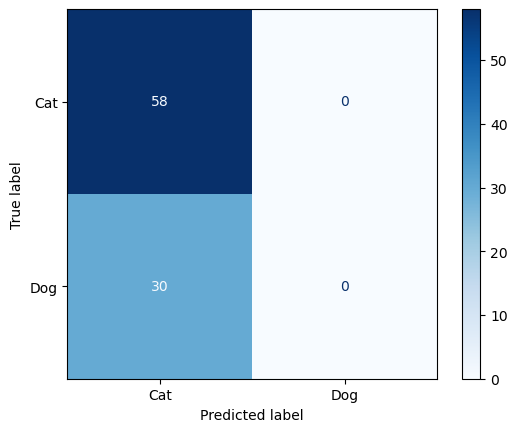

In [44]:
#Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,classification_report
import numpy as np

#Create a binary target variable: 1 for dog, 0 for cat
pets_data['is_dog'] = np.where(pets_data['animal_type'] == 'Dog', 1, 0)

#Define features and target
X = pets_data[['Temperament_Score']].values
y = pets_data['is_dog'].values

#Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#predictions
y_pred = log_reg.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Cat", "Dog"])
disp.plot(cmap="Blues")

print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.59
Confusion Matrix:
 [[30  5]
 [21  7]]
              precision    recall  f1-score   support

           0       0.59      0.86      0.70        35
           1       0.58      0.25      0.35        28

    accuracy                           0.59        63
   macro avg       0.59      0.55      0.52        63
weighted avg       0.59      0.59      0.54        63



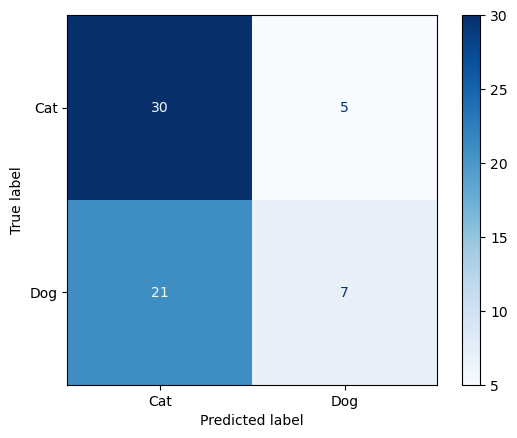

In [46]:
#unbalanced Classes- balance them below and rerun model 
from sklearn.utils import resample

cats = pets_data[pets_data['is_dog'] == 0]
dogs = pets_data[pets_data['is_dog'] == 1]

cats_downsampled = resample(cats, replace=False, n_samples=len(dogs), random_state=42)
balanced_data = pd.concat([cats_downsampled, dogs])

# Update features and target - balanced now
X = balanced_data[['Temperament_Score']].values
y = balanced_data['is_dog'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#predictions
y_pred = log_reg.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Cat", "Dog"])
disp.plot(cmap="Blues")


print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

#Did slightly better

['is_friendly', 'is_aggressive', 'is_shy', 'is_playful', 'is_nice', 'is_calm', 'is_quiet', 'is_clingy', 'is_mean']
ROC AUC Score: 0.53
Logistic Regression Accuracy: 0.56
Confusion Matrix:
 [[30  5]
 [23  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.86      0.68        35
           1       0.50      0.18      0.26        28

    accuracy                           0.56        63
   macro avg       0.53      0.52      0.47        63
weighted avg       0.54      0.56      0.50        63



C:\Users\tizia\AppData\Local\Temp\ipykernel_7796\666190169.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


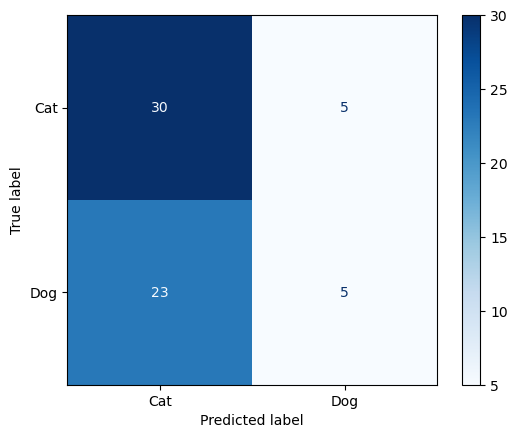

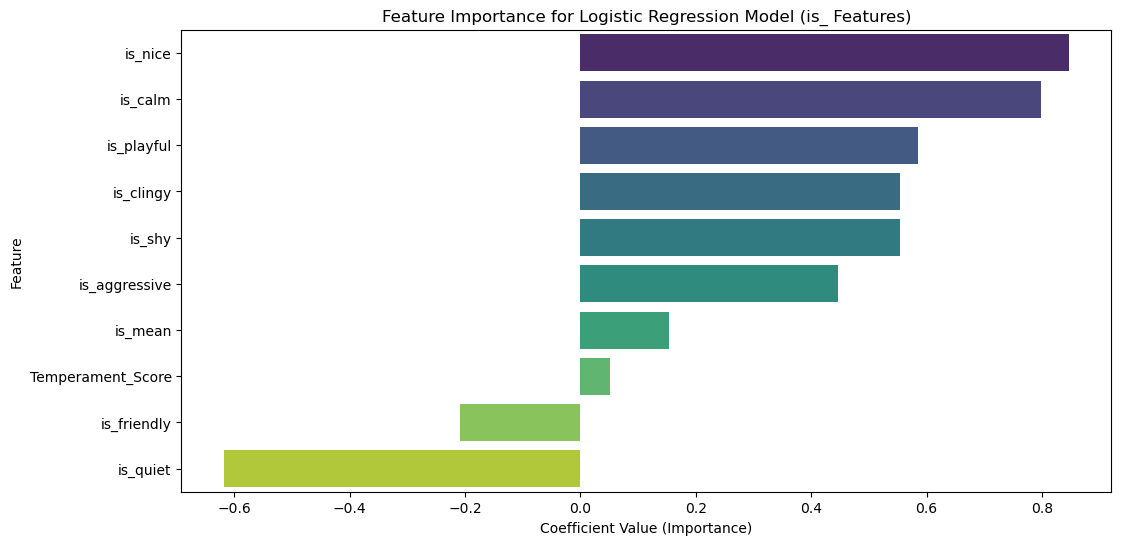

In [48]:
# try adding is_ features to help model
from sklearn.metrics import classification_report, confusion_matrix


feature_columns = [col for col in pets_data.columns if col.startswith('is_') and col != 'is_dog']
print(feature_columns)
feature_columns.append('Temperament_Score')

#features and target
X = balanced_data[feature_columns].values
y = np.where(balanced_data['animal_type'] == 'Dog', 1, 0)  # 1 for dog, 0 for cat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#predictions
y_pred = log_reg.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])[:2])
print(f"ROC AUC Score: {roc_auc:.2f}")

# Print evaluation metrics
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Cat", "Dog"])
disp.plot(cmap="Blues")


feature_importance = log_reg.coef_[0]

# Create a DataFrame for feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Logistic Regression Model (is_ Features)')
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.show()

['is_friendly', 'is_aggressive', 'is_shy', 'is_playful', 'is_nice', 'is_calm', 'is_quiet', 'is_clingy', 'is_mean']
ROC AUC Score: 0.53
Logistic Regression Accuracy: 0.56
Confusion Matrix:
 [[30  5]
 [23  5]]

Classification Report:
               precision    recall  f1-score   support

         Cat       0.57      0.86      0.68        35
         Dog       0.50      0.18      0.26        28

    accuracy                           0.56        63
   macro avg       0.53      0.52      0.47        63
weighted avg       0.54      0.56      0.50        63



C:\Users\tizia\AppData\Local\Temp\ipykernel_26448\1640380288.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


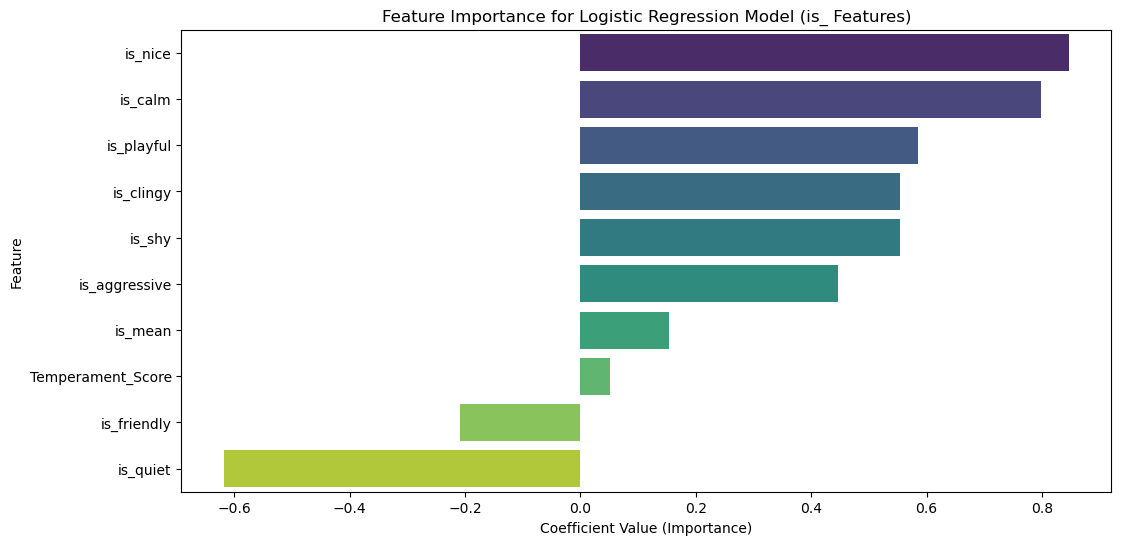

In [32]:
# try removing is_friendly feature to help model - overclassified on that as a cat
from sklearn.metrics import classification_report, confusion_matrix


feature_columns = [col for col in pets_data.columns if col.startswith('is_') and col != 'is_dog']
print(feature_columns)
feature_columns.append('Temperament_Score')

#features and target
X = balanced_data[feature_columns].values
y = np.where(balanced_data['animal_type'] == 'Dog', 1, 0)  # 1 for dog, 0 for cat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#predictions
y_pred = log_reg.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])[:2])
print(f"ROC AUC Score: {roc_auc:.2f}")

# Print evaluation metrics
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))


feature_importance = log_reg.coef_[0]

# Create a DataFrame for feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Logistic Regression Model (is_ Features)')
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.show()

In [66]:
#Apply Model with random input - use importance scores above to see which features should get you cats and which dogs
feature_input = {
    'is_friendly':2,
    'is_aggressive':0, 
    'is_shy':0,
    'is_playful':0,
    'is_nice':0,
    'is_calm':1, 
    'is_quiet':0, 
    'is_clingy':0,
    'is_mean':0,
    'Temperament_Score': 1.0
}

input_data = np.array([feature_input[feature] for feature in feature_columns]).reshape(1, -1)

# Make a prediction
predicted_class = log_reg.predict(input_data)[0]  # Binary prediction (0 = Cat, 1 = Dog)
predicted_probability = log_reg.predict_proba(input_data)[0][1]  # Probability of being Dog

# Display results
print(f"Predicted Class: {'Dog' if predicted_class == 1 else 'Cat'}")
print(f"Probability of being a Dog: {predicted_probability:.2f}")


Predicted Class: Dog
Probability of being a Dog: 0.60
